### Importing modules

In [1]:
import pandas as pd
import numpy as np
import sklearn

### Loading CSV

In [2]:
heartDiseaseData = pd.read_csv("heart disease classification dataset.csv")
heartDiseaseData.shape

(303, 15)

In [3]:
heartDiseaseData.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Dropping "Unnamed: 0 column"

In [4]:
heartDiseaseData = heartDiseaseData.drop("Unnamed: 0", axis=1)

In [5]:
heartDiseaseData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Inspecting missing(NaN) values

In [6]:
heartDiseaseData.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### SimpleImputer Import and setting its strategy to mean

In [7]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy="mean")

### Imputing 'trestbps' missing values

In [8]:
impute.fit(heartDiseaseData[['trestbps']])
heartDiseaseData['trestbps'] = impute.transform(heartDiseaseData[['trestbps']])

### Imputing 'chol' missing values

In [9]:
impute.fit(heartDiseaseData[['chol']])
heartDiseaseData['chol'] = impute.transform(heartDiseaseData[['chol']])

### Imputing 'thalach' missing values

In [10]:
impute.fit(heartDiseaseData[['thalach']])
heartDiseaseData['thalach'] = impute.transform(heartDiseaseData[['thalach']])

In [11]:
heartDiseaseData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
heartDiseaseData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Encoding

In [13]:
heartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [14]:
heartDiseaseData['sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
heartDiseaseData['target'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [17]:
heartDiseaseData['sex'] = enc.fit_transform(heartDiseaseData['sex'])
heartDiseaseData['target'] = enc.fit_transform(heartDiseaseData['target'])

### Scaling between 0-1 && Feature and Label selection

In [18]:
x = heartDiseaseData.drop(columns='target', axis=1)
y = heartDiseaseData['target']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [21]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [22]:
x_test_scaled = scaler.transform(x_test)

### Pre-PCA Accuracy list

In [23]:
preAccuracyList = []

## Pre-PCA

### svm

In [24]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
preAccuracyList.append(svc.score(x_test_scaled, y_test)*100)

### Multilayer Perceptron Classifier

In [26]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [27]:
preAccuracyList.append(nnc.score(x_test_scaled, y_test)*100)

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70)
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=70)

In [29]:
preAccuracyList.append(rfc.score(x_test_scaled, y_test)*100)

### PCA

In [30]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=7)#there are 13 feature cols taking rounded half 7 cols

In [31]:
pca.fit(x_train_scaled)
x_train_scaled_pca = pca.transform(x_train_scaled)

In [32]:
pca.fit(x_test_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

### Post-PCA Accuracy List

In [33]:
postAccuracyList = []

## Post PCA

### SVM

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train_scaled_pca, y_train)

SVC(kernel='linear')

In [35]:
postAccuracyList.append(svc.score(x_test_scaled_pca, y_test)*100)

### Multilayer Perceptron Classifier

In [36]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train_scaled_pca, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [37]:
postAccuracyList.append(nnc.score(x_test_scaled_pca, y_test)*100)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70)
rfc.fit(x_train_scaled_pca, y_train)

RandomForestClassifier(n_estimators=70)

In [39]:
postAccuracyList.append(rfc.score(x_test_scaled_pca, y_test)*100)

In [40]:
postAccuracyList

[70.49180327868852, 72.1311475409836, 65.57377049180327]

### Accuracy barchart

In [41]:
import matplotlib.pyplot as plt

In [42]:
classifiers = ["SVM", "Neural Network", "Random Forest"]

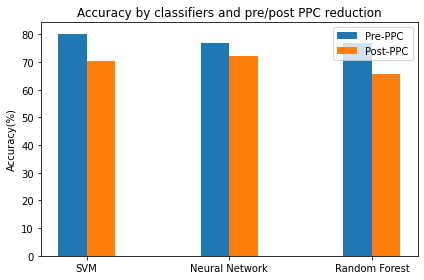

In [43]:
x = np.arange(len(classifiers))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, preAccuracyList, width, label='Pre-PPC')
rects2 = ax.bar(x + width/2, postAccuracyList, width, label='Post-PPC')

ax.set_ylabel('Accuracy(%)')
ax.set_title('Accuracy by classifiers and pre/post PPC reduction')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()


fig.tight_layout()

plt.show()